Run locally or <a target="_blank" href="https://colab.research.google.com/github/aalgahmi/dl_handouts/blob/main/00.3-REVIEW-data_visualization_matplotlib.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Data visualization with Matplotlib

Matplotlib is a comprehensive plotting library for creating static and/or interactive data visualizations. To start using it in a notebook like this, we need to tell Matplotlib to display the produced plots inside the notebook.

In [1]:
%matplotlib inline

You can use `%matplotlib widget` if you want to interact with the generated plot.

Next we import Matplotlib. While we're at it, let's import NumPy and Pandas as well. There three packages work well together.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Let's see a few examples of using Matplotlib.

## Line, scatter, and histogram plots

Plots are two-dimensional, and we need x and y values: each of which is an array. Let's genenrate 100 random numbers between 1 and 10. `x` will be the values (1 to 10) and `y` will be their counts.

In [3]:
dat = np.random.randint(1, 11, 100)
x, y = np.unique(dat, return_counts=True)
x, y

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([10, 10, 11, 12,  9, 11, 10,  9, 12,  6]))

We can plot the above x and y arrays using the `plt.plot` function.

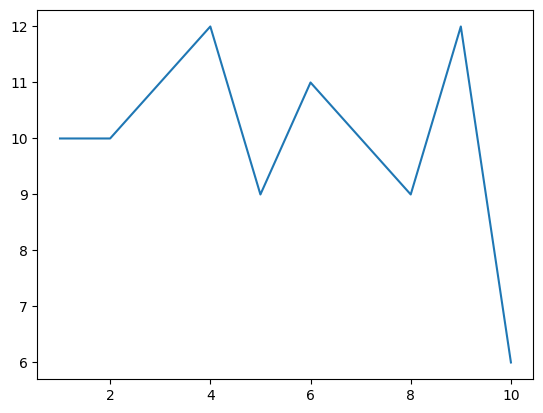

In [4]:
plt.plot(x, y)
plt.show()

The data points of the above array can be plotted using a scatter plot. To make it easier to tell values of each point, we display the gridlines using the `grid()` function.

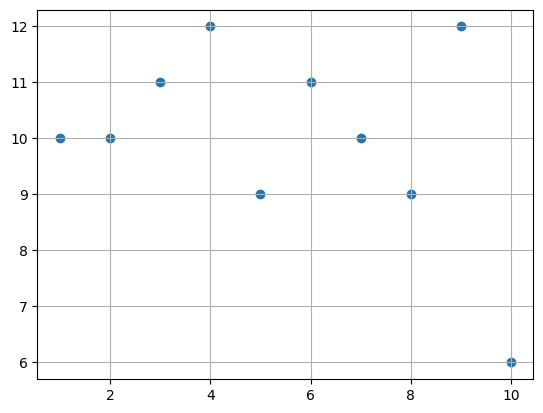

In [5]:
plt.scatter(x, y)
plt.grid()
plt.show()

We can re-plot these x an y arrays, but this time we'll add a title and axes labels. We'll also take charge of the x- and y- ticks. We'll also do both the line and scatter plots in the same figure.

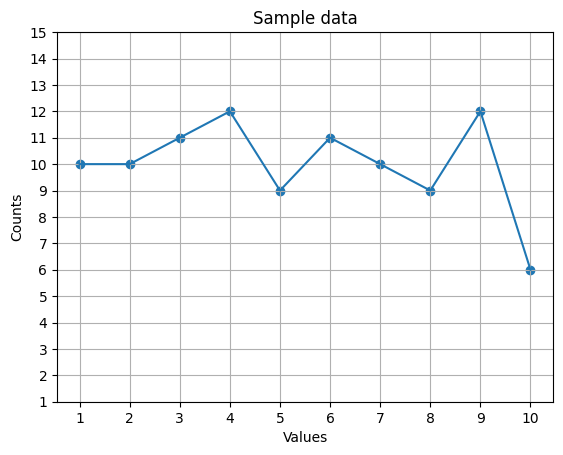

In [6]:
plt.plot(x, y)
plt.scatter(x, y)
plt.xticks(range(1, 11))
plt.yticks(range(1, 16))
plt.title("Sample data")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.grid()
plt.show()

Because the data consists of integers with different frequencies, we can visualize this data using a histogram using the `plt.hist` function. To do this we need to pass the original data array `dat` to this function. In this case, we have 10 bins.

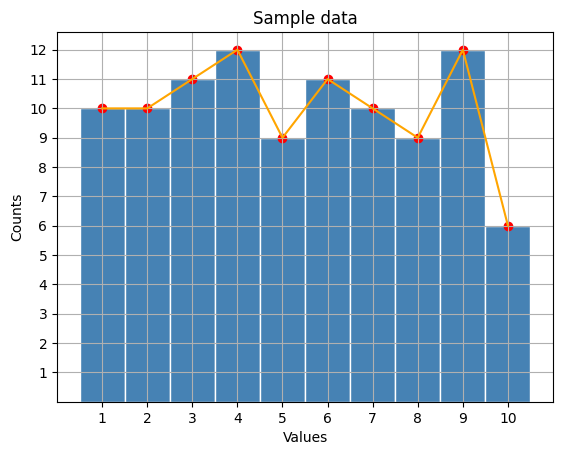

In [7]:
bins = 10
plt.hist(dat, bins=np.arange(bins + 1) + .5, color='steelblue', edgecolor='white')
plt.plot(x, y, color="orange")
plt.scatter(x, y, color="red")
plt.xticks(range(1, bins + 1))
plt.yticks(range(1, max(y) + 1))
plt.title("Sample data")
plt.xlabel("Values")
plt.ylabel("Counts")
plt.grid()
plt.show()

The expression `np.arange(bins + 1) + .5` is needed to center the histograms bins proberly

The above example has only one data source (the `dat` array). We can use one plot to visulaize multiple arrays. Here is an example plotting three different functions sharing the same `x`-axis.

$$f(x) = cos(x)$$

$$f(x) = sin(x)$$

$$f(x) = cos^2(x) - sin(x)$$

We'll add legends at the top right corner to make sure it is clear which curve belongs to which function.

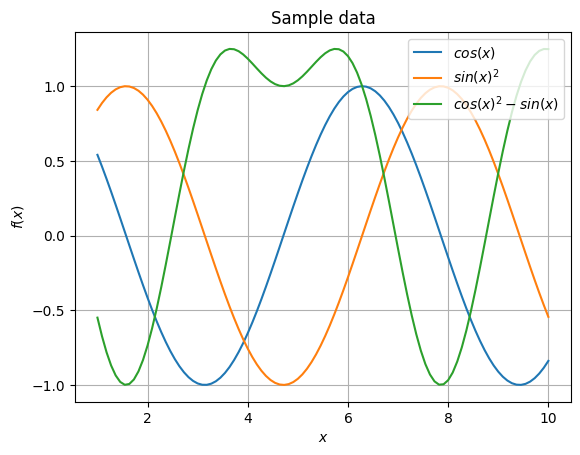

In [8]:
x = np.linspace(1, 10, 100)
plt.plot(x, np.cos(x), label="$cos(x)$")

plt.plot(x, np.sin(x), label="$sin(x)^2$")

plt.plot(x, np.cos(x)**2 - np.sin(x), label="$cos(x)^2 - sin(x)$")

plt.title("Sample data")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(loc="upper right")
plt.grid()
plt.show()

And if we want to change the colors of these plots and how their line segments are drawn (dashed vs solid for example), we can do that too.

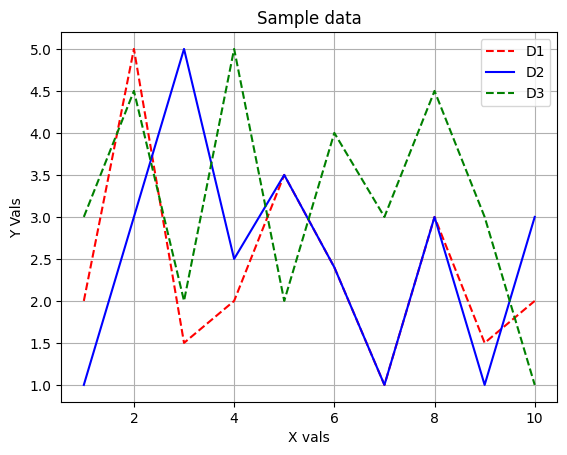

In [9]:
plt.style.use('default')
plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [2,5,1.5,2,3.5,2.4,1,3,1.5,2], color="r", linestyle='dashed', label="D1" # red dashed
)

plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [1,3,5,2.5,3.5,2.4,1,3,1,3], color="b", linestyle='solid', label="D2" # blue solid
)

plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [3,4.5,2,5,2,4,3,4.5,3,1], color="g", linestyle='dashed', label="D3" # green dashed
)

plt.title("Sample data")
plt.xlabel("X vals")
plt.ylabel("Y Vals")
plt.legend()
plt.grid()
plt.show()

which could also be done compactly using the following:

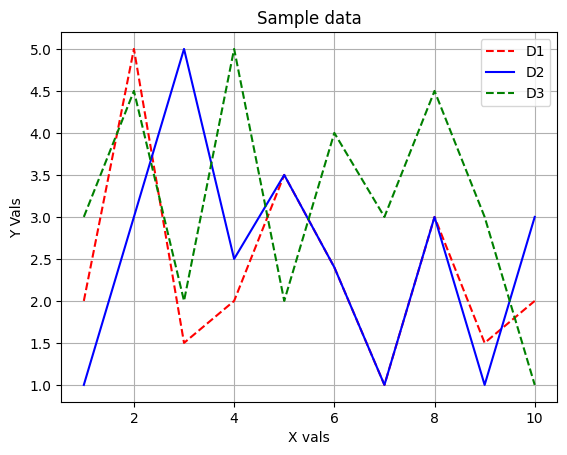

In [10]:
plt.style.use('default')
plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [2,5,1.5,2,3.5,2.4,1,3,1.5,2], 'r--', label="D1" # red dashed
)

plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [1,3,5,2.5,3.5,2.4,1,3,1,3], 'b-', label="D2" # blue solid
)

plt.plot(
    [1,2,3,4,5,6,7,8,9,10],
    [3,4.5,2,5,2,4,3,4.5,3,1], 'g--', label="D3" # green dashed
)

plt.title("Sample data")
plt.xlabel("X vals")
plt.ylabel("Y Vals")
plt.legend()
plt.grid()
plt.show()

## Bar plots

We can similarly create bar charts

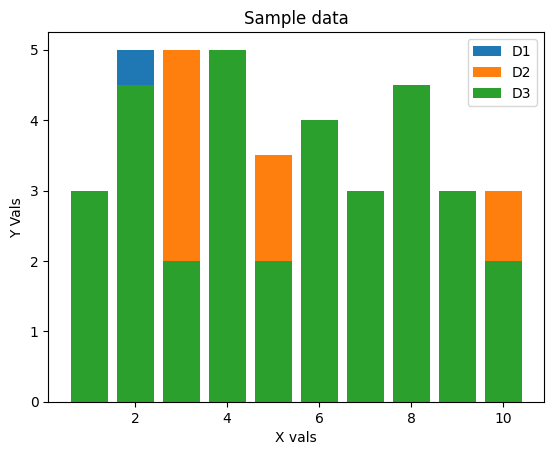

In [11]:
plt.bar(
    [1,2,3,4,5,6,7,8,9,10],
    [2,5,1.5,2,3.5,2.4,1,3,1.5,2], label="D1",
)

plt.bar(
    [1,2,3,4,5,6,7,8,9,10],
    [1,3,5,2.5,3.5,2.4,1,3,1,3], label="D2",
)

plt.bar(
    [1,2,3,4,5,6,7,8,9,10],
    [3,4.5,2,5,2,4,3,4.5,3,2], label="D3",
)

plt.title("Sample data")
plt.xlabel("X vals")
plt.ylabel("Y Vals")
plt.legend()
plt.show()

## Figures and subplots

It's recommended, when using Matplotlib, to start with creating a figure object and then use that figure object to create one or more subplots. Let's start by generating some random data and plotting it using a scatter plot.

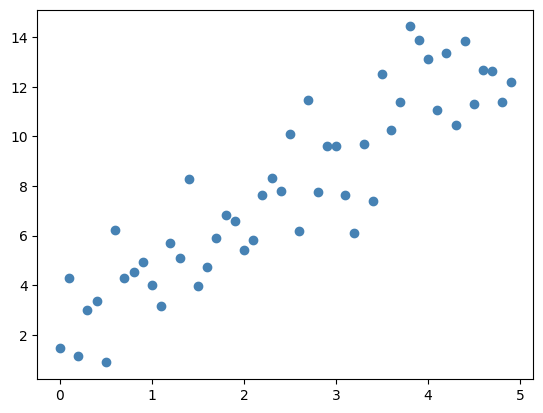

In [12]:
x = np.arange(0, 5, .1)
x = x.reshape(x.size, 1)
y = 2 * x + 2 + np.random.normal(loc=1, scale=2, size=(x.size, 1))
plt.scatter(x, y, color='steelblue', marker='o')
plt.show()

We can now create a figure:

In [13]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

This creates a figure object with the default size. We can create a figure with a custom figure size (in inches) like this.

In [14]:
fig = plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

We can now use this figure to create a subplot.

In [15]:
ax = fig.add_subplot(1, 1, 1)

The first two arguments to `add_subplot` determine how many subplots we have. Think of subplots as a 2D array. A $1 \times 1$ means a single subplot, a $1 \times 2$ means two subplots side by side, and a $2 \times 2$ means 4 subplots: two rows and two columns.

The third argument to `add_subplot` tells Matplotlib which subplot we are plotting into.

Let's now draw the scatter plot above into this figure. We'll used a different style.

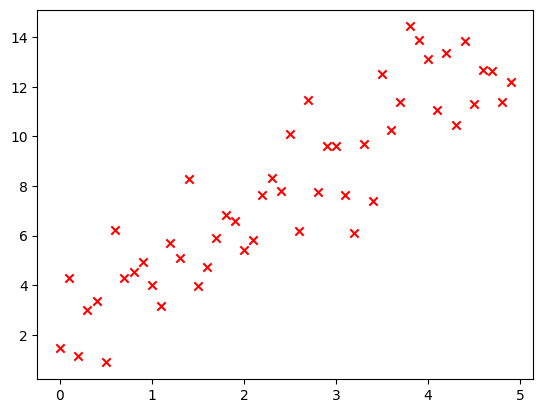

In [16]:
plt.scatter(x, y, color='r', marker='x')
plt.show()

Here is an example with multiple subplots. As you can see, we can use the `ax` object returned by `fig.add_subplot` to customize these subplots. To do that, instead using functions like `plt.title`, and `plt.xlabel` etc we use setter functions like `ax.set_title`, `ax.set_xlabel`, and so on.

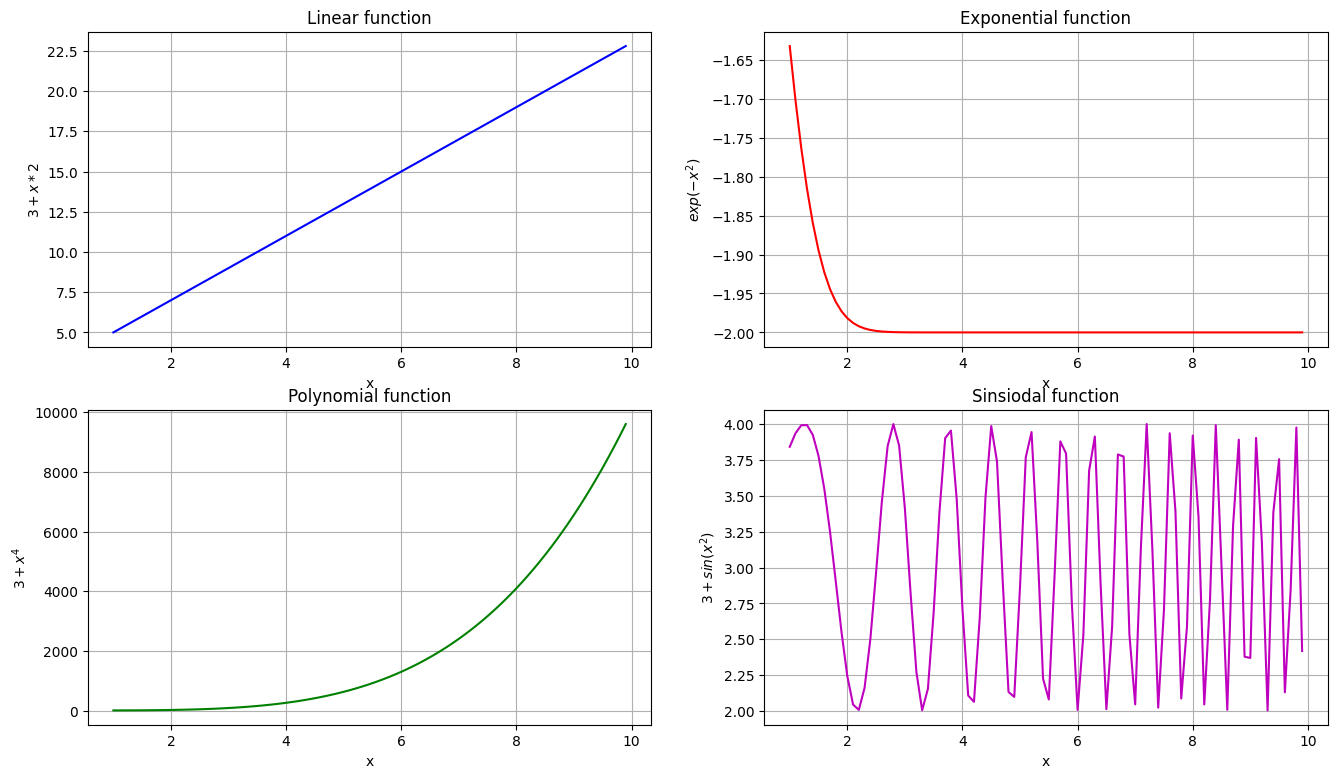

In [17]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(2, 2, 1) # First subplot

x = np.arange(1, 10 ,0.1)
ax.plot(x, 3 + x*2, 'b-')
ax.set_ylabel("$3 + x*2$")
ax.set_xlabel('x')
ax.set_title("Linear function")
ax.grid()

ax = fig.add_subplot(2, 2, 2) # Second subplot
ax.plot(x, -2 + np.exp(-x**2), 'r-')
ax.set_ylabel("$exp(-x^2)$")
ax.set_xlabel('x')
ax.set_title("Exponential function")
ax.grid()

ax = fig.add_subplot(2, 2, 3) # Third subplot
ax.plot(x, 3 + x**4, 'g-')
ax.set_ylabel("$ 3 + x^4$")
ax.set_xlabel('x')
ax.set_title("Polynomial function")
ax.grid()

ax = fig.add_subplot(2, 2, 4) # Fourth subplot
ax.plot(x, 3 + np.sin(x**2), 'm-')
ax.set_ylabel("$3 + sin(x^2)$")
ax.set_xlabel('x')
ax.set_title("Sinsiodal function")
ax.grid()
plt.show()

The above could also be done using `plt.subplots`, which creates a figure with the requested number of subplots.

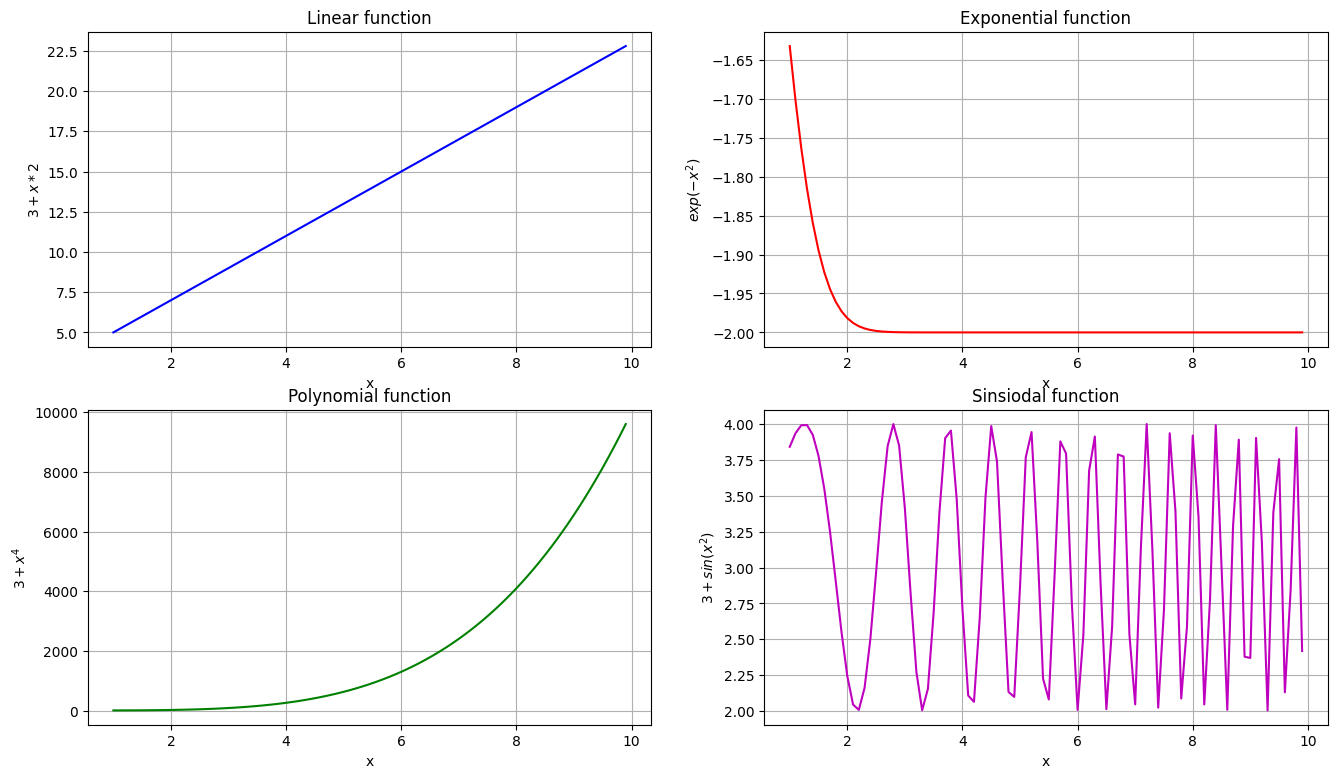

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9)) # Creates a figure and 2 by 2 array of subplots
x = np.arange(1, 10 ,0.1)
axes[0,0].plot(x, 3 + x*2, 'b-')  # First subplot
axes[0,0].set_ylabel("$3 + x*2$")
axes[0,0].set_xlabel('x')
axes[0,0].set_title("Linear function")
axes[0,0].grid()

axes[0,1].plot(x, -2 + np.exp(-x**2), 'r-') # Second subplot
axes[0,1].set_ylabel("$exp(-x^2)$")
axes[0,1].set_xlabel('x')
axes[0,1].set_title("Exponential function")
axes[0,1].grid()

axes[1,0].plot(x, 3 + x**4, 'g-') # Third subplot
axes[1,0].set_ylabel("$ 3 + x^4$")
axes[1,0].set_xlabel('x')
axes[1,0].set_title("Polynomial function")
axes[1,0].grid()

axes[1,1].plot(x, 3 + np.sin(x**2), 'm-') # Fourth subplot
axes[1,1].set_ylabel("$3 + sin(x^2)$")
axes[1,1].set_xlabel('x')
axes[1,1].set_title("Sinsiodal function")
axes[1,1].grid()
plt.show()

## Saving a figure
We can save a figure to file using the `fig.savefig` function. The statement below saves the above figure to a file named `functions.png` under the `assets` folder.

In [19]:
fig.savefig('functions.png', dpi=72, bbox_inches='tight')

## Plotting images
First, we download a few images to work with. There are, simply, the logos of Numpy, Pandas, and Matplotlib.


In [20]:
import urllib

urllib.request.urlretrieve("https://github.com/aalgahmi/dl_handouts/blob/main/assets/numpy.png?raw=true", "numpy.png")
urllib.request.urlretrieve("https://github.com/aalgahmi/dl_handouts/blob/main/assets/pandas.png?raw=true", "pandas.png")
urllib.request.urlretrieve("https://github.com/aalgahmi/dl_handouts/blob/main/assets/matplotlib.png?raw=true", "matplotlib.png")


('matplotlib.png', <http.client.HTTPMessage at 0x7eb2881fbe50>)

We can plot images by reading them using the `plt.imread` function and plotting them using the `plt.imshow` function.

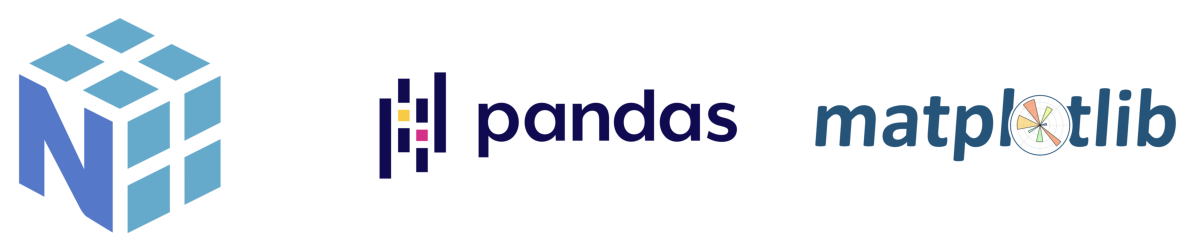

In [21]:
fig = plt.figure(figsize=(16, 3))

img = plt.imread("numpy.png")
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')

img = plt.imread("pandas.png")
plt.subplot(1,3,2)
plt.imshow(img)
plt.axis('off')

img = plt.imread("matplotlib.png")
plt.subplot(1,3,3)
plt.imshow(img)
plt.axis('off')
plt.show()

If the image is remote, we can use the `PIL` and `urllib` libraries to read it to a Numpy array before we plot it with `plt.imshow`.

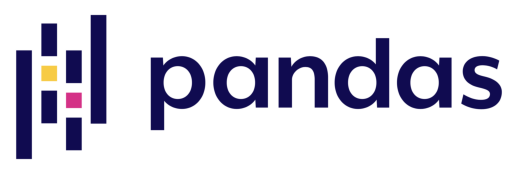

In [22]:
import urllib
from PIL import Image
a = np.array(Image.open(urllib.request.urlopen("https://github.com/aalgahmi/dl_handouts/blob/main/assets/pandas.png?raw=true")))

plt.imshow(a)
plt.axis("off")
plt.show()

And here we can use the `axes` array returned by `fig.subplots` to customize any of the created subplots.